<a href="https://colab.research.google.com/github/ShreyasMunde/CODSOFT/blob/main/Task3_irisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/archive (2).zip')

In [5]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le=LabelEncoder()


In [11]:
for i in df.columns:
    if is_numeric_dtype(df[i]):
         continue
    else:
        df[i]=le.fit_transform(df[i])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<ipython-input-13-7d75638f4e17>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df,palette="Set2")


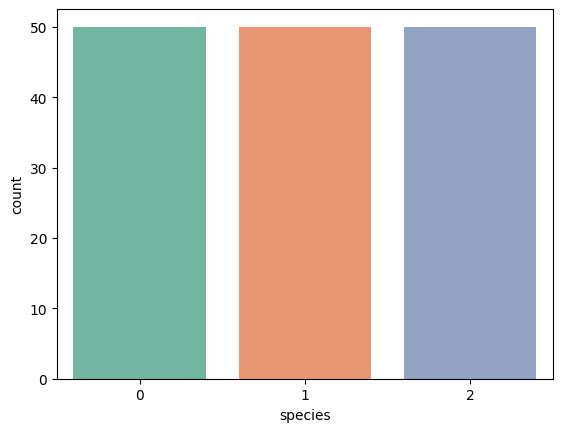

In [13]:
sns.countplot(x='species', data=df,palette="Set2")
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

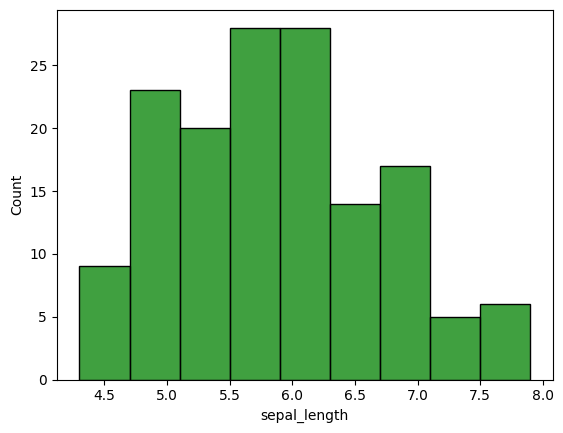

In [14]:
sns.histplot(data=df,x=df.sepal_length,color='green')


<Axes: xlabel='sepal_width', ylabel='Count'>

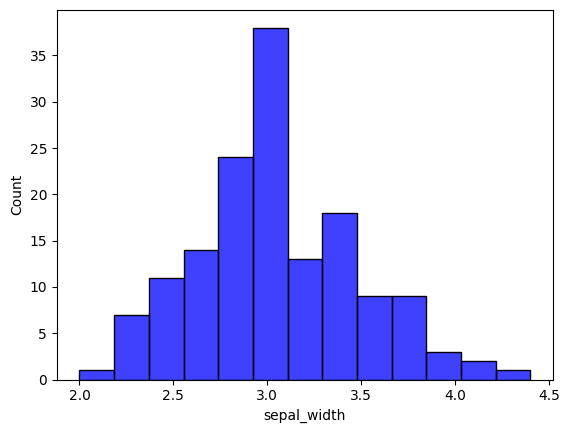

In [15]:
sns.histplot(data=df,x=df.sepal_width,color='blue')

<Axes: xlabel='petal_width', ylabel='Count'>

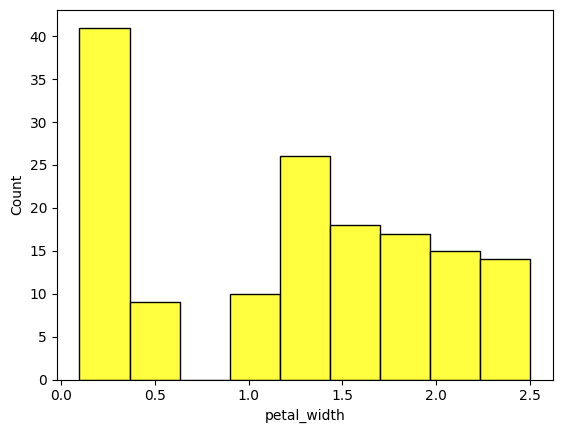

In [16]:
sns.histplot(data=df,x=df.petal_width,color='yellow')

<Axes: >

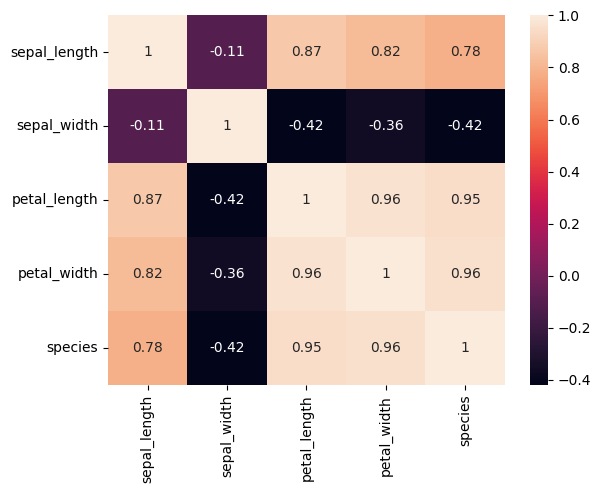

In [17]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [20]:
x=df.drop(['species'],axis=1)
y=df.species

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
Model=LogisticRegression()
Model.fit(x_train,y_train)

LogisticRegression()

In [24]:
print("print for train data",Model.score(x_train,y_train))
print("print for test data",Model.score(x_test,y_test))

print for train data 0.9619047619047619
print for test data 0.9555555555555556


In [25]:
from sklearn.ensemble import RandomForestClassifier
Model2=RandomForestClassifier(n_estimators=300,random_state=100)
Model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
Model3=KNeighborsClassifier()
Model3.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
print("Score for train data",Model3.score(x_train,y_train))
print("Score for test data",Model3.score(x_test,y_test))

Score for train data 0.9809523809523809
Score for test data 0.9555555555555556


In [28]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
data={'sepal_length':[5.2],'sepal_width':[3.6],'petal_length':[1.4],'petal_width':[0.2]}
trail=pd.DataFrame(data)

In [39]:
result= Model.predict(trail)
print("Result Species:",result[0])

Result Species: 0


<Axes: >

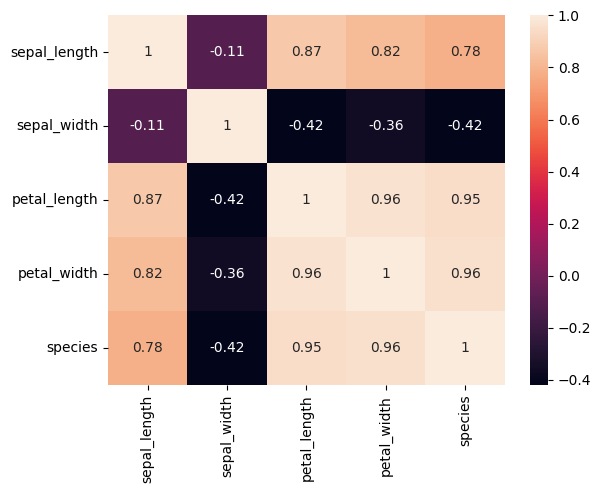

In [31]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [32]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [35]:
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


<Axes: xlabel='sepal_width', ylabel='species'>

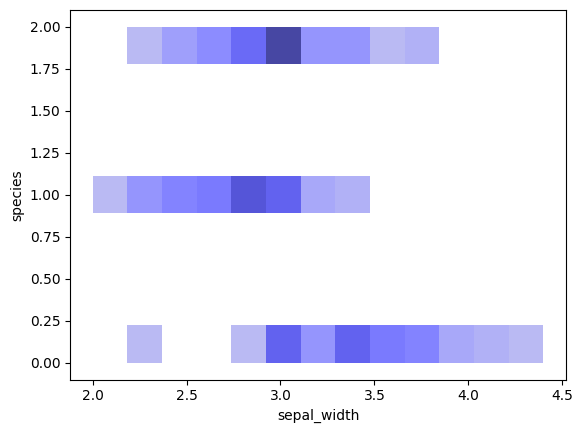

In [40]:
sns.histplot(data=df,x=df.sepal_width,y=df.species,color='blue')

<Axes: xlabel='species', ylabel='sepal_length'>

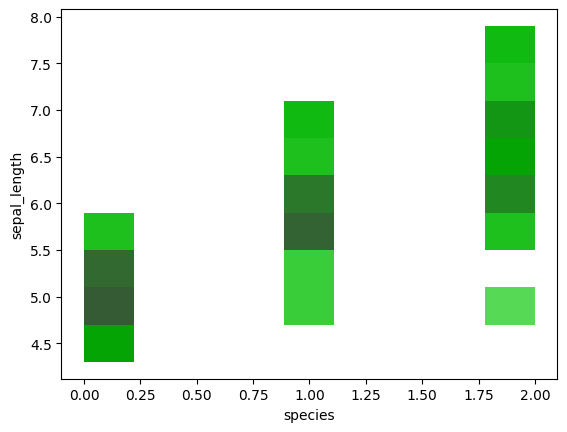

In [42]:
sns.histplot(data=df,x=df.species,y=df.sepal_length,color='green')